## K-均值聚类算法

K-均值聚类支持函数

In [6]:
from numpy import *
def loadDataSet(fileName):                                                            # 将文本文件导入一个列表中
    dataMat = []                #assume last column is target value
    fr = open(fileName)
    for line in fr.readlines():
        curLine = line.strip().split('\t')
        fltLine = list(map(float,curLine)) #map all elements to float()
        dataMat.append(fltLine)
    return dataMat

def distEclud(vecA, vecB):                                                            # 计算两个向量之间的欧氏距离
    return sqrt(sum(power(vecA - vecB, 2))) #la.norm(vecA-vecB)

def randCent(dataSet, k):                                                             # 为给定的数据集构建一个包含k个随机质心的集合
    n = shape(dataSet)[1]
    centroids = mat(zeros((k,n)))#create centroid mat
    for j in range(n):#create random cluster centers, within bounds of each dimension
        minJ = min(dataSet[:,j]) 
        rangeJ = float(max(dataSet[:,j]) - minJ)
        centroids[:,j] = mat(minJ + rangeJ * random.rand(k,1))
    return centroids

In [9]:
#尝试
datMat=mat(loadDataSet('testSet.txt'))
min(datMat[:,0])

matrix([[-5.379713]])

In [10]:
randCent(datMat,2)

matrix([[3.23065753, 0.51049916],
        [0.71028114, 4.49800762]])

K-均值聚类算法

In [12]:
def kMeans(dataSet, k, distMeas=distEclud, createCent=randCent):
    '''input:  dataSet                 输入数据集
               k                       簇的个数
               distMeas                距离计算方法（默认为欧式距离）
               createCent              生成随机质心的方法
       output：centroids               质心
               clusterAssment          簇分配结果矩阵，每个数据点到当前迭代的质心的距离
              
    '''
    m = shape(dataSet)[0]
    clusterAssment = mat(zeros((m,2)))                                             # 簇分配结果矩阵，第一列为簇的索引值，第二列为存储误差（当前点到簇心的距离）
    centroids = createCent(dataSet, k)                                             # 随机生成k个质心
    clusterChanged = True                                                          # 标志变量，True为继续迭代
    while clusterChanged:
        clusterChanged = False
                                                                                   # 计算每个数据点到每个质心的距离，把样本点分配到距离最近的质心所在的簇
        for i in range(m):                                                         # 遍历每个样本点
            minDist = inf; minIndex = -1                                           # 初始化
            for j in range(k):                                                     # 遍历k个质心
                distJI = distMeas(centroids[j,:],dataSet[i,:])                     # 计算距离
                if distJI < minDist:                                               # 若当前计算的距离小于当前的最小距离
                    minDist = distJI; minIndex = j                                 # 更新最小距离及与该样本点最小距离的簇索引
            if clusterAssment[i,0] != minIndex: clusterChanged = True              # 否则继续迭代
            clusterAssment[i,:] = minIndex,minDist**2                              # 迭代结束后更新簇分配结果矩阵
        print(centroids)                                                           # 打印质心
                                                                                   #  recalculate centroids 样本点重新分配后更新质心的位置 
        for cent in range(k):                                                      #  遍历每个簇
            ptsInClust = dataSet[nonzero(clusterAssment[:,0].A==cent)[0]]          #  得到当前每个簇下的样本 
            centroids[cent,:] = mean(ptsInClust, axis=0) #assign centroid to mean  #  重新计算质心
    return centroids, clusterAssment                                               #  返回最终的质心和样本，簇分配结果矩阵

In [13]:
myCentroids, clustAssing = kMeans(datMat, 4)

[[ 0.0560684   3.12513293]
 [-2.76827301  0.16100137]
 [-4.11719377 -2.65675131]
 [ 2.49910479 -0.04968725]]
[[ 0.55536091  3.3760927 ]
 [-3.2308203   2.5758848 ]
 [-3.38237045 -2.9473363 ]
 [ 2.92197237 -1.4858577 ]]
[[ 2.225975    3.17026943]
 [-2.64677572  2.78993217]
 [-3.38237045 -2.9473363 ]
 [ 2.8692781  -2.54779119]]
[[ 2.6265299   3.10868015]
 [-2.46154315  2.78737555]
 [-3.38237045 -2.9473363 ]
 [ 2.80293085 -2.7315146 ]]


In [ ]:
# 质心
myCentroids

In [17]:
# 簇分配结果
clustAssing #第一列为簇索引，第二列为点到簇质心的距离平方值，其和为SSE（误差平方和）

matrix([[0.00000000e+00, 2.32019150e+00],
        [1.00000000e+00, 1.39004893e+00],
        [3.00000000e+00, 6.63839104e+00],
        [2.00000000e+00, 4.16140951e+00],
        [0.00000000e+00, 2.76967820e+00],
        [1.00000000e+00, 2.80101213e+00],
        [3.00000000e+00, 5.85909807e+00],
        [2.00000000e+00, 1.50646425e+00],
        [0.00000000e+00, 2.29348924e+00],
        [1.00000000e+00, 6.45967483e-01],
        [3.00000000e+00, 1.74010499e+00],
        [2.00000000e+00, 3.77769471e-01],
        [0.00000000e+00, 2.51695402e+00],
        [1.00000000e+00, 1.38716420e-01],
        [3.00000000e+00, 9.47633071e+00],
        [2.00000000e+00, 9.97310599e+00],
        [0.00000000e+00, 2.39726914e+00],
        [1.00000000e+00, 3.10242360e+00],
        [3.00000000e+00, 4.11084375e-01],
        [2.00000000e+00, 4.74890795e-01],
        [0.00000000e+00, 1.38706133e-01],
        [1.00000000e+00, 5.10240996e-01],
        [3.00000000e+00, 1.05700176e+00],
        [2.00000000e+00, 2.9018182

绘制图形

In [15]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
def showPlt(datMat, alg=kMeans, numClust=4):
    myCentroids, clustAssing = alg(datMat, numClust)
    fig = plt.figure()
    rect=[0.1,0.1,0.8,0.8]
    scatterMarkers=['s', 'o', '^', '8', 'p', \
                    'd', 'v', 'h', '>', '<']
    axprops = dict(xticks=[], yticks=[])
    ax0=fig.add_axes(rect, label='ax0', **axprops)
    ax1=fig.add_axes(rect, label='ax1', frameon=False)
    for i in range(numClust):
        ptsInCurrCluster = datMat[nonzero(clustAssing[:,0].A==i)[0],:]
        markerStyle = scatterMarkers[i % len(scatterMarkers)]
        ax1.scatter(ptsInCurrCluster[:,0].flatten().A[0], ptsInCurrCluster[:,1].flatten().A[0], marker=markerStyle, s=90)
    ax1.scatter(myCentroids[:,0].flatten().A[0], myCentroids[:,1].flatten().A[0], marker='+', s=300)
    plt.show()

[[-3.56518136  3.55288054]
 [ 2.63885204  2.24871457]
 [-1.66817574  2.70333637]
 [ 4.48082197  3.3211104 ]]
[[-3.41800871  2.93589971]
 [ 2.62853943 -0.12325638]
 [-2.81673367 -0.71971252]
 [ 3.777752    4.034599  ]]
[[-2.45009747  2.89275747]
 [ 2.84369962 -2.01546021]
 [-3.34887714 -2.76960033]
 [ 2.5212765   3.49464725]]
[[-2.46154315  2.78737555]
 [ 2.80293085 -2.7315146 ]
 [-3.38237045 -2.9473363 ]
 [ 2.6265299   3.10868015]]


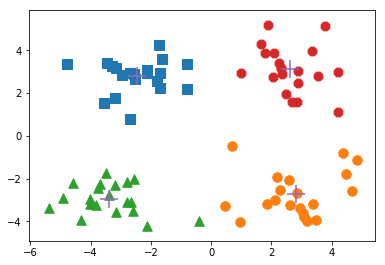

In [16]:
showPlt(datMat)

## 二分 K-均值算法
二分K-均值聚类算法

In [18]:
def biKmeans(dataSet, k, distMeas=distEclud):
    '''input:  dataSet                 输入数据集
               k                       簇的个数
               distMeas                距离计算方法（默认为欧式距离）
       output：mat(centList)               质心
               clusterAssment          簇分配结果矩阵，每个数据点到当前迭代的质心的距离
              
    '''
    m = shape(dataSet)[0]
    clusterAssment = mat(zeros((m,2)))
    centroid0 = mean(dataSet, axis=0).tolist()[0]                            # create a list with one centroid 创建一个初始簇，包含所有样本点，并计算其质心
    centList =[centroid0]                                                    # 初始化质心列表
                                                                             # calc initial Error，SSE
    for j in range(m):                                                       # 遍历每个样本点
        clusterAssment[j,1] = distMeas(mat(centroid0), dataSet[j,:])**2      # 计算误差平方和
    while (len(centList) < k):                                               # 当质心个数小于k时
        lowestSSE = inf                                                      # 初始化最小的总SSE
        for i in range(len(centList)):                                       # 遍历质心（/簇），决定最佳的簇进行划分
            ptsInCurrCluster = dataSet[nonzero(clusterAssment[:,0].A==i)[0],:]# get the data points currently in cluster i 得到当前迭代阶段，第i个簇的数据点
            centroidMat, splitClustAss = kMeans(ptsInCurrCluster, 2, distMeas)# 对该簇进行二分kmeans，返回两个质心及原簇中每个数据点的误差平方
                                                                              # compare the SSE to the currrent minimum 
            sseSplit = sum(splitClustAss[:,1])                                # 计算第i个簇二分后的SSE
            sseNotSplit = sum(clusterAssment[nonzero(clusterAssment[:,0].A!=i)[0],1]) #计算其他簇的SSE
            print("sseSplit, and notSplit: ",sseSplit,sseNotSplit)
            if (sseSplit + sseNotSplit) < lowestSSE:                          # 若总的SSE小于当前最小SSE
                bestCentToSplit = i                                           # 保存该次划分的原簇索引
                bestNewCents = centroidMat                                    # 保存当前最佳质心
                bestClustAss = splitClustAss.copy()                           # 保存当前簇分配结果矩阵
                lowestSSE = sseSplit + sseNotSplit                            # 保存当前最小SSE
                                                                              # 当使用kmeans函数进行二分时，会得到两个编号为0，1的结果簇，须将簇索引进行修改
        bestClustAss[nonzero(bestClustAss[:,0].A == 0)[0],0] = bestCentToSplit# 更新簇分配结果
        bestClustAss[nonzero(bestClustAss[:,0].A == 1)[0],0] = len(centList)    
        print('the bestCentToSplit is: ',bestCentToSplit)
        print('the len of bestClustAss is: ', len(bestClustAss))
                                                                              # replace a centroid with two best centroids  新的质心加入
        centList[bestCentToSplit] = bestNewCents[0,:].tolist()[0]             
        centList.append(bestNewCents[1,:].tolist()[0])
        clusterAssment[nonzero(clusterAssment[:,0].A == bestCentToSplit)[0],:]= bestClustAss# reassign new clusters, and SSE
    return mat(centList), clusterAssment

In [19]:
datMat3=mat(loadDataSet('testSet2.txt'))
centList,myNewAssments=biKmeans(datMat3, 3)

[[2.43280707 3.10476198]
 [2.69325125 2.48890488]]
[[-0.84735206  3.46862312]
 [ 0.63042504 -1.33843332]]
[[-0.26853357  3.36606168]
 [ 0.02053813 -2.21845543]]
[[-0.06953469  3.29844341]
 [-0.32150057 -2.62473743]]
[[-0.00675605  3.22710297]
 [-0.45965615 -2.7782156 ]]
sseSplit, and notSplit:  453.0334895807502 0.0
the bestCentToSplit is:  0
the len of bestClustAss is:  60
[[-0.64191518  3.22140454]
 [-4.29847385  4.23461537]]
[[ 1.71544126  3.19785696]
 [-3.58362738  3.28784469]]
[[ 2.76275171  3.12704005]
 [-3.06779095  3.33769884]]
[[ 2.93386365  3.12782785]
 [-2.94737575  3.3263781 ]]
sseSplit, and notSplit:  77.59224931775066 29.15724944412535
[[-1.02830639 -2.40518368]
 [-0.47390119 -1.82956941]]
[[-0.79119775 -3.01183442]
 [ 0.03765625 -2.42778737]]
[[-1.02964518 -2.81778218]
 [ 0.23699711 -2.72985644]]
[[-1.07894467 -2.43015258]
 [ 0.46927663 -3.30031012]]
[[-1.12616164 -2.30193564]
 [ 0.35496167 -3.36033556]]
sseSplit, and notSplit:  12.753263136887313 423.8762401366249
the b

In [20]:
centList

matrix([[ 2.93386365,  3.12782785],
        [-0.45965615, -2.7782156 ],
        [-2.94737575,  3.3263781 ]])

[[-1.64294741 -0.54936566]
 [ 2.86986901  2.56757723]]
[[-1.73028592  0.20133246]
 [ 2.76275171  3.12704005]]
[[-1.70351595  0.27408125]
 [ 2.93386365  3.12782785]]
sseSplit, and notSplit:  541.2976292649145 0.0
the bestCentToSplit is:  0
the len of bestClustAss is:  60
[[-3.21956364  0.13868122]
 [-3.65376031 -2.62732035]]
[[-2.70276287  2.73635965]
 [-0.35159365 -3.05723659]]
[[-2.94737575  3.3263781 ]
 [-0.45965615 -2.7782156 ]]
sseSplit, and notSplit:  67.2202000797829 39.52929868209309
[[4.26021192 2.25639706]
 [2.64831317 3.91693318]]
[[3.70083043 2.36911829]
 [2.52088154 3.53636377]]
[[3.67729122 2.56674644]
 [2.32560473 3.58689445]]
[[3.7472375 2.7964297]
 [2.1204898 3.459226 ]]
[[3.67574036 2.82216836]
 [2.02712544 3.50141167]]
sseSplit, and notSplit:  23.79175073044931 501.7683305828214
the bestCentToSplit is:  0
the len of bestClustAss is:  40


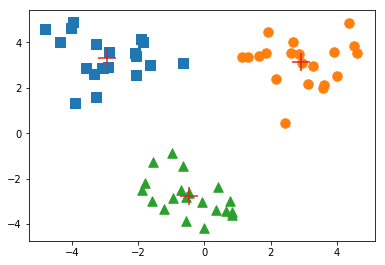

In [21]:
showPlt(datMat3, alg=biKmeans, numClust=3)